<a href="https://colab.research.google.com/github/renatauribes/opt_energy_cemex/blob/main/cargaDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Carga de datos**

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importación de las librerías:.

In [ ]:
import pandas as pd # Libreria para data frames
import numpy as np # Libreria para operaciones matemáticas
import matplotlib.pyplot as plt

Carga de la base de datos y creación del data frame:

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/EQUIPO RETO CIENCIA DE DATOS/datos_tec.csv')
df.head()

,TIME,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
0,01/01/1995 0:00,100.0,368,2.78,15.1,29.7,0.053
1,02/01/1995 0:00,100.0,426,3.00,26.9,0.0,0.108
2,03/01/1995 0:00,101.0,446,3.00,29.5,0.0,0.098
3,04/01/1995 0:00,99.0,395,3.00,18.9,25.4,0.056
4,05/01/1995 0:00,102.0,380,3.00,17.5,26.6,0.051


Conteo de registros por columna:

In [ ]:
df.shape

(9392, 7)

array([[<AxesSubplot:title={'center':'Dureza'}>,
        <AxesSubplot:title={'center':'Tasa_Prod'}>],
       [<AxesSubplot:title={'center':'Asp'}>,
        <AxesSubplot:title={'center':'EC'}>],
       [<AxesSubplot:title={'center':'EE'}>,
        <AxesSubplot:title={'center':'Calidad'}>]], dtype=object)

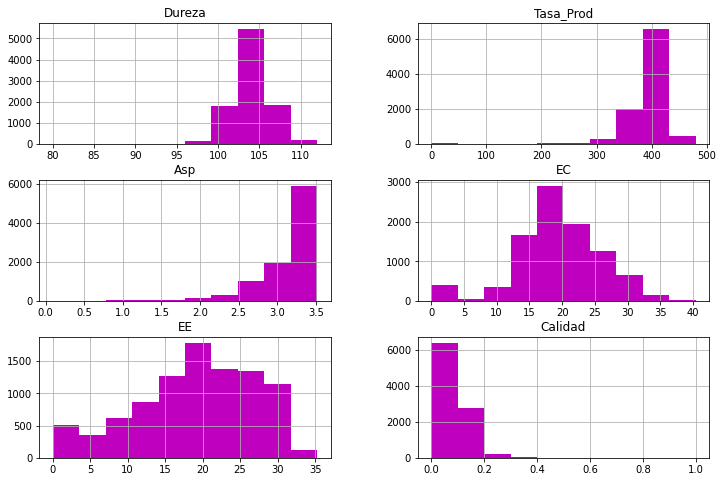

In [ ]:
df.hist(color="m", figsize=(12,8))

# **Limpieza de Datos**

Identificación de valores nulos en la base de datos:

In [ ]:
df.isnull().values.any()

True

Conteo de valores nulos por columna:

In [ ]:
df.isnull().sum()

TIME         0
Dureza       1
Tasa_Prod    0
Asp          1
EC           0
EE           0
Calidad      0
dtype: int64

Se eliminan las filas en las que se encuentra algún valor nulo, en este caso solo existen dos, por lo que es un cambio mínimo y el análisis no se verá afectado con dos registros menos.

In [ ]:
df_sin_out = df.dropna(axis=0,how='any', thresh=None, subset=None)

Se comprueba que ya no existen valores nulos:

In [ ]:
df_sin_out.isnull().sum()

TIME         0
Dureza       0
Tasa_Prod    0
Asp          0
EC           0
EE           0
Calidad      0
dtype: int64

In [ ]:
df_sin_out.shape #Sin null values

(9390, 7)

In [ ]:
df_sin_out = df_sin_out[df_sin_out['Calidad'] >=  0.039]

In [ ]:
df_sin_out.shape

(8874, 7)

Revisamos el tipo de datos que contiene cada columna:

In [ ]:
df_sin_out.dtypes

TIME          object
Dureza       float64
Tasa_Prod      int64
Asp          float64
EC           float64
EE           float64
Calidad      float64
dtype: object

# **Obtención de las métricas básicas del arreglo inicial**

In [ ]:
df_sin_out.median()

Dureza       104.000
Tasa_Prod    398.000
Asp            3.260
EC            19.300
EE            20.200
Calidad        0.084
dtype: float64

In [ ]:
df_sin_out.max()

TIME         31/12/2019 0:00
Dureza                   112
Tasa_Prod                480
Asp                     3.52
EC                      40.4
EE                      35.3
Calidad                    1
dtype: object

In [ ]:
df_sin_out.min()

TIME         01/01/1995 0:00
Dureza                    80
Tasa_Prod                  0
Asp                     0.09
EC                         0
EE                         0
Calidad                0.039
dtype: object

In [ ]:
df_sin_out.std()

Dureza        2.045327
Tasa_Prod    41.875131
Asp           0.368985
EC            6.655789
EE            7.976253
Calidad       0.048100
dtype: float64

In [ ]:
df_sin_out.quantile([0.25,0.5,0.75])

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
0.25,103.0,384.0,3.04,16.1,14.6,0.064
0.50,104.0,398.0,3.26,19.3,20.2,0.084
0.75,105.0,409.0,3.38,23.7,25.4,0.109


In [ ]:
df_sin_out.describe()

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
count,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000,8874.000000
mean,104.087559,391.821501,3.156699,19.497465,19.258057,0.093265
std,2.045327,41.875131,0.368985,6.655789,7.976253,0.048100
min,80.000000,0.000000,0.090000,0.000000,0.000000,0.039000
25%,103.000000,384.000000,3.040000,16.100000,14.600000,0.064000
50%,104.000000,398.000000,3.260000,19.300000,20.200000,0.084000
75%,105.000000,409.000000,3.380000,23.700000,25.400000,0.109000
max,112.000000,480.000000,3.520000,40.400000,35.300000,1.000000


# **Outliers**

**Para identificar los outliers de cada columna:**

In [ ]:
import seaborn as sns # Libreria de visualización
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
Q1 = df_sin_out.quantile(0.25)
Q3 = df_sin_out.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
((df_sin_out < (Q1 - 1.5 * IQR)) | (df_sin_out > (Q3 + 1.5 * IQR))).sum()

Asp          497
Calidad      400
Dureza       275
EC           405
EE             0
TIME           0
Tasa_Prod    492
dtype: int64

<AxesSubplot:xlabel='Dureza'>

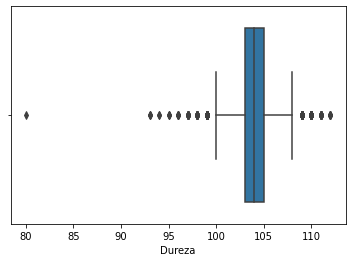

In [ ]:
sns.boxplot(x=df_sin_out['Dureza'], showfliers =True)


<AxesSubplot:xlabel='Tasa_Prod'>

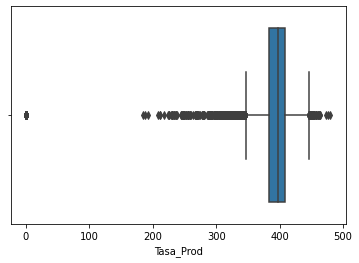

In [ ]:
sns.boxplot(x=df_sin_out['Tasa_Prod'])

<AxesSubplot:xlabel='Asp'>

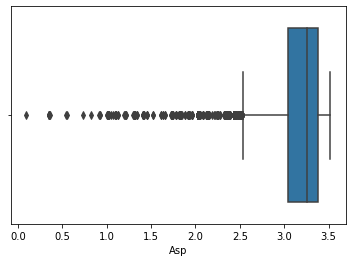

In [ ]:
sns.boxplot(x=df_sin_out['Asp'])

<AxesSubplot:xlabel='EC'>

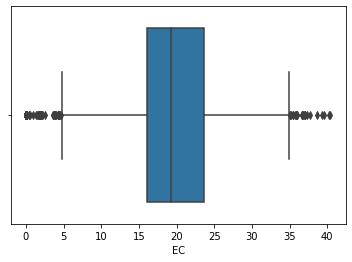

In [ ]:
sns.boxplot(x=df_sin_out['EC'])

<AxesSubplot:xlabel='EE'>

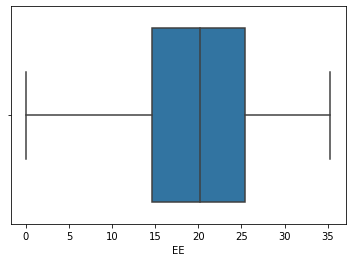

In [ ]:
sns.boxplot(x=df_sin_out['EE'])

<AxesSubplot:xlabel='Calidad'>

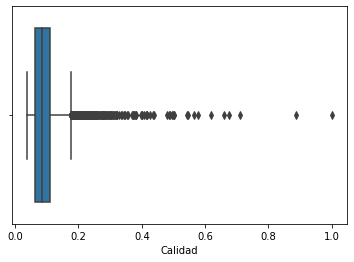

In [ ]:
sns.boxplot(x=df_sin_out['Calidad'])

In [ ]:
df_sin_out.set_index("TIME", inplace = True)
df_sin_out.sort_index(inplace=True)

In [ ]:
df_sin_out.shape

(8874, 6)

**Eliminar Outliers**

In [ ]:
# Eliminar Outliers con método de Z-Score
z = np.abs(stats.zscore(df_sin_out))
z

array([[1.99859974, 0.56890195, 1.02096552, 0.66073493, 1.30920267,
        0.83716215],
       [0.93508219, 0.84012827, 0.71362186, 1.06718161, 0.358341  ,
        0.21342   ],
       [0.53175878, 1.00730135, 0.71362186, 1.1873845 , 0.97269919,
        0.17183719],
       ...,
       [1.02070576, 0.19531783, 0.68651894, 0.24078675, 0.06794836,
        0.19262859],
       [1.50965275, 0.26696344, 0.74072479, 0.10479656, 1.12113383,
        0.46291686],
       [0.4461352 , 0.2191997 , 0.19866623, 0.40530379, 1.19636137,
        0.90931587]])

In [ ]:
np.where(z > 2.5)

(array([  16,   34,   43, ..., 8844, 8855, 8860]),
 array([3, 5, 3, ..., 5, 5, 3]))

In [ ]:
df_sin_out = df_sin_out[(z<2.5).all(axis=1)]


In [ ]:
df_sin_out.shape

(7990, 6)

# **Visualización de Datos**

**Análisis de correlación de datos**

In [ ]:
# Análisis de correlación de datos

df_small = df_sin_out.iloc[:,:]

plt.figure(figsize =(15,20))
correlation_mat = df_small.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

NameError: ignored

**Histograma por variables**

array([[<AxesSubplot:title={'center':'Dureza'}>,
        <AxesSubplot:title={'center':'Tasa_Prod'}>],
       [<AxesSubplot:title={'center':'Asp'}>,
        <AxesSubplot:title={'center':'EC'}>],
       [<AxesSubplot:title={'center':'EE'}>,
        <AxesSubplot:title={'center':'Calidad'}>]], dtype=object)

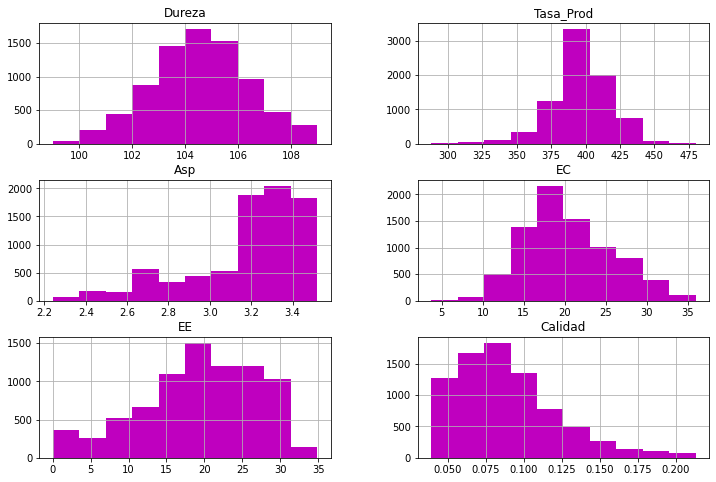

In [ ]:
# Histograma de las variables 
df_sin_out.hist(color="m", figsize=(12,8))

**Diagramas de dispersión de las variables EE y EC con el resto de las variables para encontrar posibles patrones**

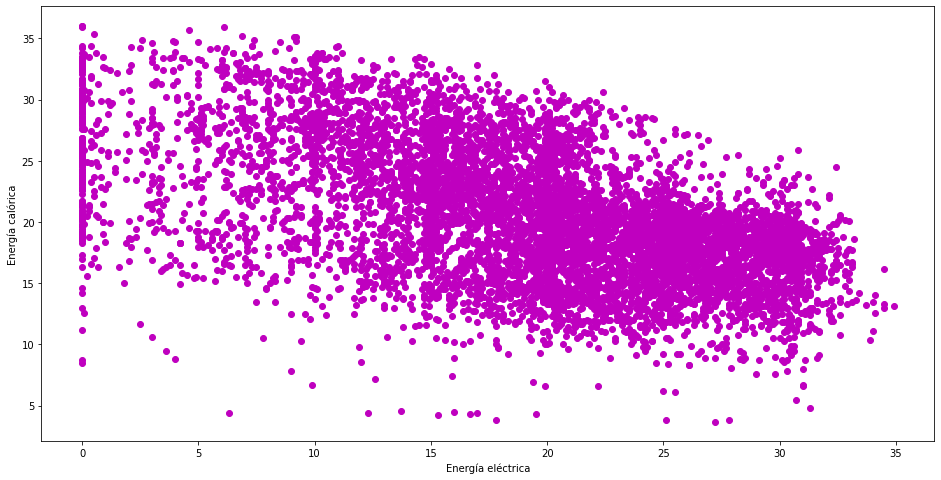

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_sin_out['EE'], df_sin_out['EC'], c = 'm')
ax.set_xlabel('Energía eléctrica')
ax.set_ylabel('Energía calórica')
plt.show()

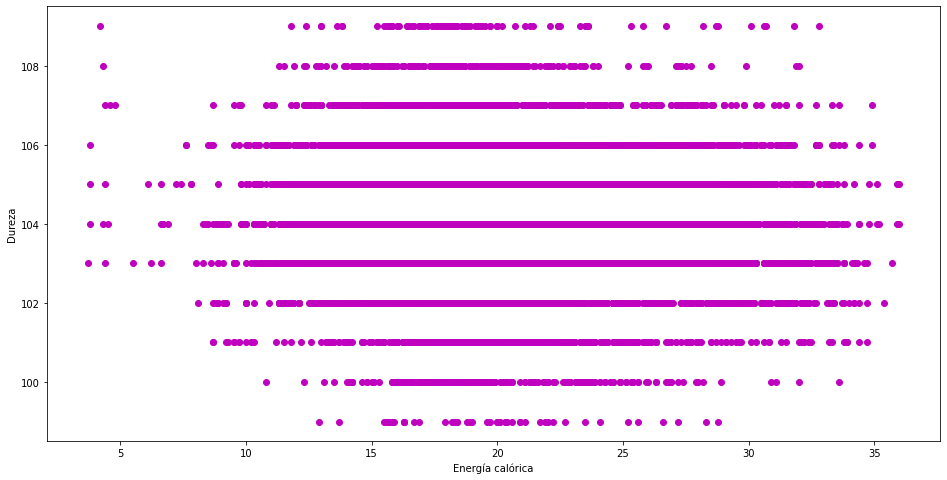

In [ ]:
# EC y Dureza
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_sin_out['EC'], df_sin_out['Dureza'], c = 'm')
ax.set_xlabel('Energía calórica')
ax.set_ylabel('Dureza')
plt.show()

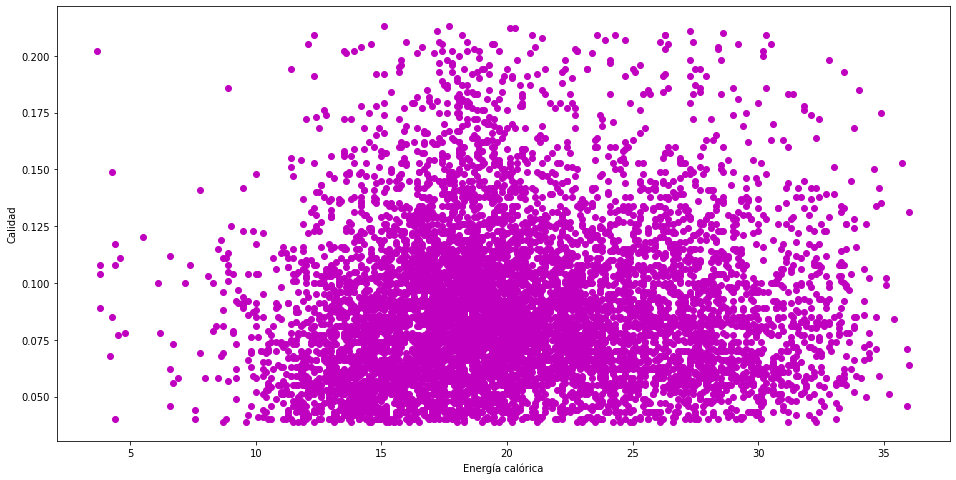

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_sin_out['EC'], df_sin_out['Calidad'], c = 'm')
ax.set_xlabel('Energía calórica')
ax.set_ylabel('Calidad')
plt.show()

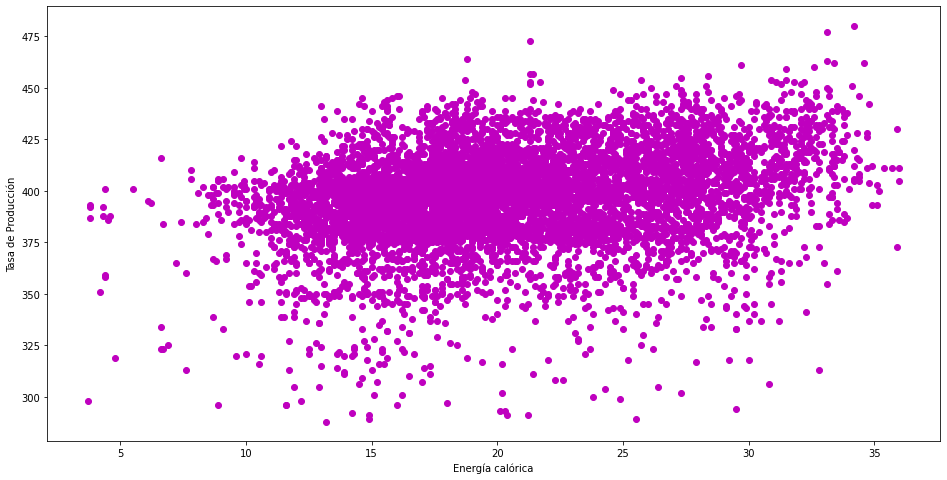

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_sin_out['EC'], df_sin_out['Tasa_Prod'], c = 'm')
ax.set_xlabel('Energía calórica')
ax.set_ylabel('Tasa de Producción')
plt.show()

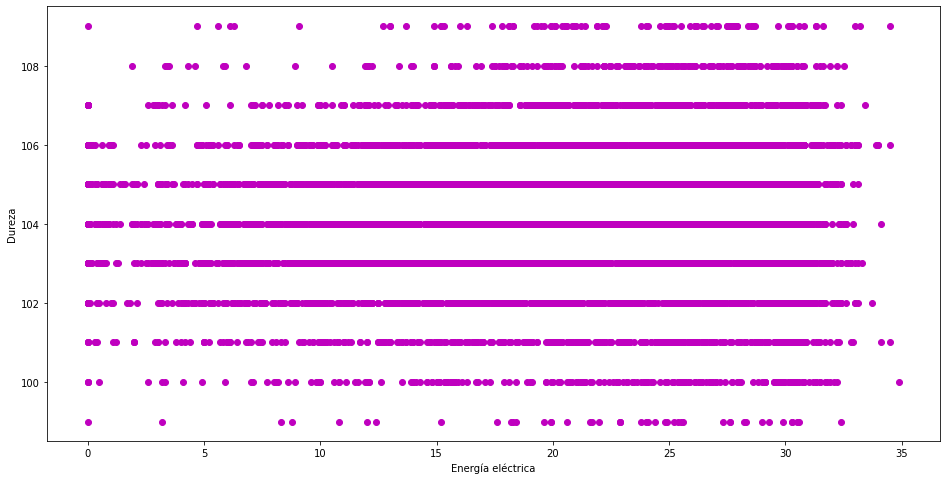

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_sin_out['EE'], df_sin_out['Dureza'], c = 'm')
ax.set_xlabel('Energía eléctrica')
ax.set_ylabel('Dureza')
plt.show()

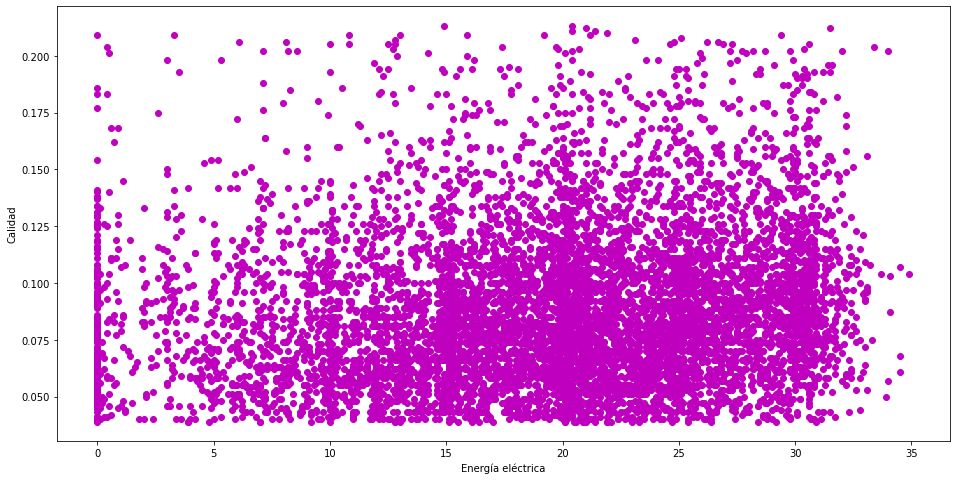

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_sin_out['EE'], df_sin_out['Calidad'], c = 'm')
ax.set_xlabel('Energía eléctrica')
ax.set_ylabel('Calidad')
plt.show()

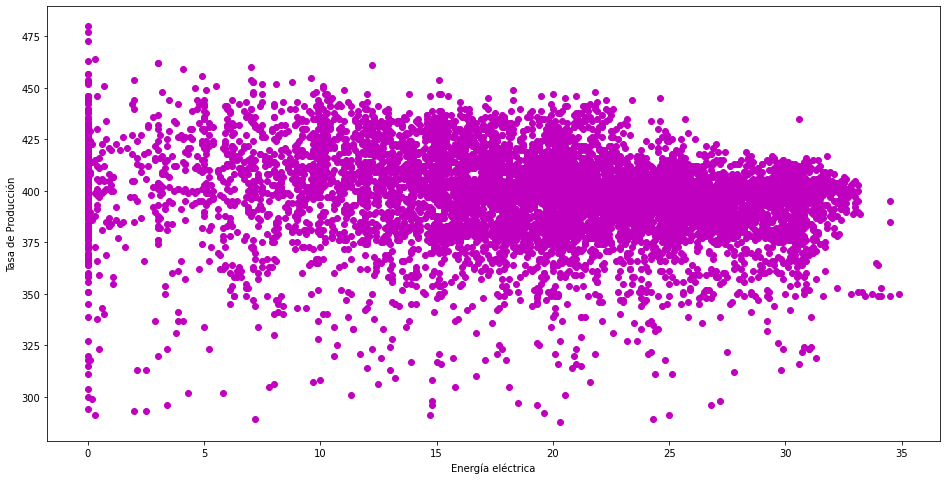

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_sin_out['EE'], df_sin_out['Tasa_Prod'], c = 'm')
ax.set_xlabel('Energía eléctrica')
ax.set_ylabel('Tasa de Producción')
plt.show()

# **Conclusiones Entregable 2**

Para esta etapa se concretó la limpieza de datos. Se identificaron los valores atípicos de la base de datos a través del gráfico de Boxplot y posteriormente fueron eliminados con ayuda del método de Z-score. Una vez eliminados se efectuó un análisis de correlación y se crearon distintos gráficos de dispersión para encontrar patrones.

Con base en los valores obtenidos, se puede concluir que la Dureza y la Calidad, con un índice de 0.22 podrían estar relacionadas entre sí; de la misma forma, considerando los dos tipos de energía (EE Y EC), la energía calórica se relaciona más con la tasa de producción(0.26), mientras que la eléctrica con la calidad del producto (0.16). A pesar de esto, los valores obtenidos son muy bajos pues no superan el 0.5. 

En cuanto a los histogramas, podemos observar que algunos tienden a contar con una distribución normal, sobre todo la dureza con una simetría casi perfecta. La aspersión es anormal, pero debido a que no nos enfocaremos en ella para la modelación del algoritmo no es de gran importancia. 
Por otro lado, en los gráficas de dispersión, las variables ya mencionadas con correlación más alta son en las que los valores tienden a concentrarse más, de la misma forma, valores de correlación por debajo del cero, crean gráficas más dispersas con lineas horizontales.


# **Agregar Costos**

**Obtener costo Total de EE y EC**

In [ ]:
df_sin_out["costoTotal"] = df_sin_out['EE'] + 0.724*df_sin_out['EC']

#df_sin_out.loc[:,'costoTotal'] = df_sin_out.sum(, axis=1)
df_sin_out

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad,costoTotal
TIME,,,,,,,
01/01/1995 0:00,100.0,368,2.78,15.1,29.7,0.053,40.6324
01/01/1996 0:00,106.0,427,3.42,26.6,16.4,0.083,35.6584
01/01/1997 0:00,103.0,434,3.42,27.4,11.5,0.085,31.3376
01/01/1998 0:00,103.0,395,2.82,24.5,16.4,0.074,34.1380
01/01/1999 0:00,106.0,388,3.32,26.2,19.1,0.111,38.0688
...,...,...,...,...,...,...,...
31/12/2015 0:00,107.0,405,3.17,15.1,26.1,0.192,37.0324
31/12/2016 0:00,101.0,403,3.34,16.9,26.5,0.090,38.7356
31/12/2017 0:00,102.0,400,3.41,21.1,19.8,0.084,35.0764


**Obtener costo PONDERADO**

In [ ]:
df_sin_out["costoPonderado"] = df_sin_out['costoTotal'] / df_sin_out['Tasa_Prod']
df_sin_out

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad,costoTotal,costoPonderado
TIME,,,,,,,,
01/01/1995 0:00,100.0,368,2.78,15.1,29.7,0.053,40.6324,0.110414
01/01/1996 0:00,106.0,427,3.42,26.6,16.4,0.083,35.6584,0.083509
01/01/1997 0:00,103.0,434,3.42,27.4,11.5,0.085,31.3376,0.072206
01/01/1998 0:00,103.0,395,2.82,24.5,16.4,0.074,34.1380,0.086425
01/01/1999 0:00,106.0,388,3.32,26.2,19.1,0.111,38.0688,0.098115
...,...,...,...,...,...,...,...,...
31/12/2015 0:00,107.0,405,3.17,15.1,26.1,0.192,37.0324,0.091438
31/12/2016 0:00,101.0,403,3.34,16.9,26.5,0.090,38.7356,0.096118
31/12/2017 0:00,102.0,400,3.41,21.1,19.8,0.084,35.0764,0.087691


**Obtener costo EE PONDERADA**

In [ ]:
df_sin_out["EE_Ponderada"] = df_sin_out['EE'] / df_sin_out['Tasa_Prod']
df_sin_out

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad,costoTotal,costoPonderado,EE_Ponderada
TIME,,,,,,,,,
01/01/1995 0:00,100.0,368,2.78,15.1,29.7,0.053,40.6324,0.110414,0.080707
01/01/1996 0:00,106.0,427,3.42,26.6,16.4,0.083,35.6584,0.083509,0.038407
01/01/1997 0:00,103.0,434,3.42,27.4,11.5,0.085,31.3376,0.072206,0.026498
01/01/1998 0:00,103.0,395,2.82,24.5,16.4,0.074,34.1380,0.086425,0.041519
01/01/1999 0:00,106.0,388,3.32,26.2,19.1,0.111,38.0688,0.098115,0.049227
...,...,...,...,...,...,...,...,...,...
31/12/2015 0:00,107.0,405,3.17,15.1,26.1,0.192,37.0324,0.091438,0.064444
31/12/2016 0:00,101.0,403,3.34,16.9,26.5,0.090,38.7356,0.096118,0.065757
31/12/2017 0:00,102.0,400,3.41,21.1,19.8,0.084,35.0764,0.087691,0.049500


**Obtener EC PONDERADA**

In [ ]:
df_sin_out["EC_Ponderada"] = df_sin_out['EC'] / df_sin_out['Tasa_Prod']
df_sin_out

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad,costoTotal,costoPonderado,EE_Ponderada,EC_Ponderada
TIME,,,,,,,,,,
01/01/1995 0:00,100.0,368,2.78,15.1,29.7,0.053,40.6324,0.110414,0.080707,0.041033
01/01/1996 0:00,106.0,427,3.42,26.6,16.4,0.083,35.6584,0.083509,0.038407,0.062295
01/01/1997 0:00,103.0,434,3.42,27.4,11.5,0.085,31.3376,0.072206,0.026498,0.063134
01/01/1998 0:00,103.0,395,2.82,24.5,16.4,0.074,34.1380,0.086425,0.041519,0.062025
01/01/1999 0:00,106.0,388,3.32,26.2,19.1,0.111,38.0688,0.098115,0.049227,0.067526
...,...,...,...,...,...,...,...,...,...,...
31/12/2015 0:00,107.0,405,3.17,15.1,26.1,0.192,37.0324,0.091438,0.064444,0.037284
31/12/2016 0:00,101.0,403,3.34,16.9,26.5,0.090,38.7356,0.096118,0.065757,0.041935
31/12/2017 0:00,102.0,400,3.41,21.1,19.8,0.084,35.0764,0.087691,0.049500,0.052750


# **GRAFICAS DE DISPERSION 3D PARA CALIDAD Y DUREZA**

**EEP, ECP, CALIDAD**

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

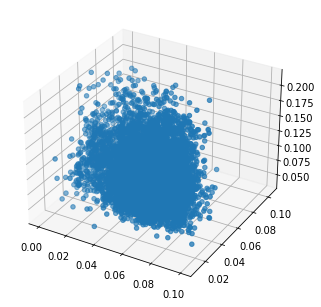

In [ ]:
def scatter3D(x,y,z):
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.scatter(x,y,z)
scatter3D(df_sin_out['EE_Ponderada'], df_sin_out['EC_Ponderada'], df_sin_out['Calidad'])

**EEP, ECP, DUREZA**

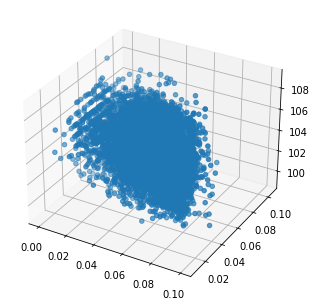

In [ ]:
scatter3D(df_sin_out['EE_Ponderada'], df_sin_out['EC_Ponderada'], df_sin_out['Dureza'])

# **DATOS OPTIMIZADOS**


**Reescala data set con los mejores datos para costo ponderado**

In [ ]:
from sklearn import preprocessing

# costoPonderado reshape
# c = np.array(df_sin_out['costoPonderado']).reshape(-1,1)

#minmax_scale = preprocessing.MinMaxScaler().fit_transform(c)
#scaled_frame = pd.DataFrame(minmax_scale,columns=['costoPonderado'])
#scaled_frame.head(10)

In [ ]:
df_sin_out

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad,costoTotal,costoPonderado,EE_Ponderada,EC_Ponderada
TIME,,,,,,,,,,
01/01/1995 0:00,100.0,368,2.78,15.1,29.7,0.053,40.6324,0.110414,0.080707,0.041033
01/01/1996 0:00,106.0,427,3.42,26.6,16.4,0.083,35.6584,0.083509,0.038407,0.062295
01/01/1997 0:00,103.0,434,3.42,27.4,11.5,0.085,31.3376,0.072206,0.026498,0.063134
01/01/1998 0:00,103.0,395,2.82,24.5,16.4,0.074,34.1380,0.086425,0.041519,0.062025
01/01/1999 0:00,106.0,388,3.32,26.2,19.1,0.111,38.0688,0.098115,0.049227,0.067526
...,...,...,...,...,...,...,...,...,...,...
31/12/2015 0:00,107.0,405,3.17,15.1,26.1,0.192,37.0324,0.091438,0.064444,0.037284
31/12/2016 0:00,101.0,403,3.34,16.9,26.5,0.090,38.7356,0.096118,0.065757,0.041935
31/12/2017 0:00,102.0,400,3.41,21.1,19.8,0.084,35.0764,0.087691,0.049500,0.052750


In [ ]:
#s_f = np.array(scaled_frame["costoPonderado"])
#s_f

#df_sin_out['costoPonderado'] = scaled_frame['costoPonderado'].values
#df_sin_out

In [ ]:
df_OPT = df_sin_out.loc[df_sin_out.groupby('Calidad').costoPonderado.idxmin()]
df_OPT

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad,costoTotal,costoPonderado,EE_Ponderada,EC_Ponderada
TIME,,,,,,,,,,
01/10/2008 0:00,106.0,413,3.38,19.7,0.0,0.039,14.2628,0.034535,0.000000,0.047700
21/09/1996 0:00,103.0,396,3.52,11.2,0.0,0.040,8.1088,0.020477,0.000000,0.028283
01/02/2003 0:00,105.0,457,3.37,21.4,0.0,0.041,15.4936,0.033903,0.000000,0.046827
12/07/2002 0:00,103.0,419,3.30,17.9,0.6,0.042,13.5596,0.032362,0.001432,0.042721
29/05/2007 0:00,102.0,374,2.56,24.0,0.0,0.043,17.3760,0.046460,0.000000,0.064171
...,...,...,...,...,...,...,...,...,...,...
19/05/2020 0:00,104.0,412,3.52,26.3,0.0,0.209,19.0412,0.046217,0.000000,0.063835
20/01/2000 0:00,104.0,404,2.64,28.6,21.9,0.210,42.6064,0.105461,0.054208,0.070792
17/10/2008 0:00,105.0,440,3.38,17.2,21.4,0.211,33.8528,0.076938,0.048636,0.039091


array([[<AxesSubplot:title={'center':'Dureza'}>,
        <AxesSubplot:title={'center':'Tasa_Prod'}>,
        <AxesSubplot:title={'center':'Asp'}>],
       [<AxesSubplot:title={'center':'EC'}>,
        <AxesSubplot:title={'center':'EE'}>,
        <AxesSubplot:title={'center':'Calidad'}>],
       [<AxesSubplot:title={'center':'costoTotal'}>,
        <AxesSubplot:title={'center':'costoPonderado'}>,
        <AxesSubplot:title={'center':'EE_Ponderada'}>],
       [<AxesSubplot:title={'center':'EC_Ponderada'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

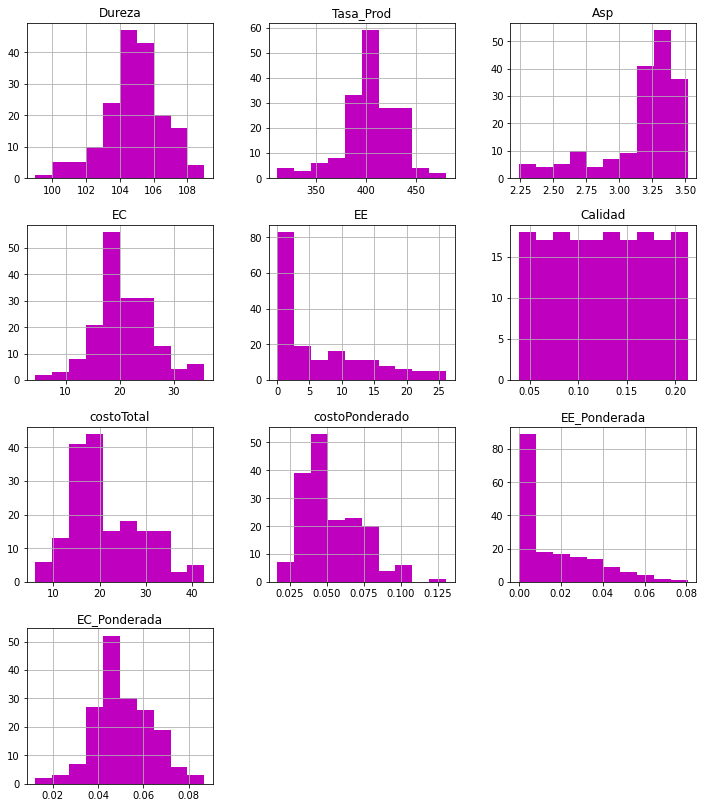

In [ ]:
df_OPT.hist(color="m", figsize=(12,14))

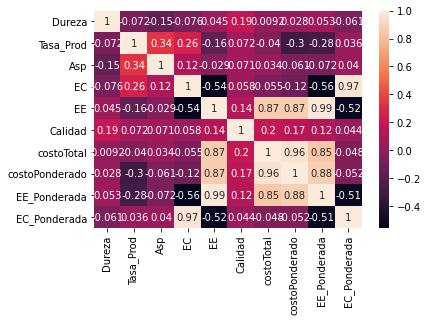

In [ ]:
df_small = df_sin_out.iloc[:,:]

correlation_mat = df_small.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

# **Data Preparation**

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split


In [ ]:
X = np.array(df_OPT[['Calidad','Dureza','Tasa_Prod']])
X

array([[3.90e-02, 1.06e+02, 4.13e+02],
       [4.00e-02, 1.03e+02, 3.96e+02],
       [4.10e-02, 1.05e+02, 4.57e+02],
       [4.20e-02, 1.03e+02, 4.19e+02],
       [4.30e-02, 1.02e+02, 3.74e+02],
       [4.40e-02, 1.03e+02, 3.86e+02],
       [4.50e-02, 1.05e+02, 3.90e+02],
       [4.60e-02, 1.03e+02, 4.45e+02],
       [4.70e-02, 1.04e+02, 4.33e+02],
       [4.80e-02, 1.03e+02, 3.92e+02],
       [4.90e-02, 1.04e+02, 4.64e+02],
       [5.00e-02, 1.02e+02, 4.00e+02],
       [5.10e-02, 1.04e+02, 3.20e+02],
       [5.20e-02, 1.02e+02, 4.00e+02],
       [5.30e-02, 1.04e+02, 4.05e+02],
       [5.40e-02, 9.90e+01, 3.82e+02],
       [5.50e-02, 1.03e+02, 3.98e+02],
       [5.60e-02, 1.04e+02, 3.84e+02],
       [5.70e-02, 1.00e+02, 4.07e+02],
       [5.80e-02, 1.07e+02, 4.01e+02],
       [5.90e-02, 1.04e+02, 4.35e+02],
       [6.00e-02, 1.05e+02, 4.07e+02],
       [6.10e-02, 1.04e+02, 4.24e+02],
       [6.20e-02, 1.04e+02, 4.33e+02],
       [6.30e-02, 1.05e+02, 4.21e+02],
       [6.40e-02, 1.04e+0

In [ ]:
Y = np.array(df_OPT[['EE','EC','costoPonderado']])
Y

array([[0.00000000e+00, 1.97000000e+01, 3.45346247e-02],
       [0.00000000e+00, 1.12000000e+01, 2.04767677e-02],
       [0.00000000e+00, 2.14000000e+01, 3.39028446e-02],
       [6.00000000e-01, 1.79000000e+01, 3.23618138e-02],
       [0.00000000e+00, 2.40000000e+01, 4.64598930e-02],
       [1.20000000e+00, 1.99000000e+01, 4.04341969e-02],
       [1.00000000e-01, 1.26000000e+01, 2.36471795e-02],
       [0.00000000e+00, 2.03000000e+01, 3.30274157e-02],
       [0.00000000e+00, 2.15000000e+01, 3.59491917e-02],
       [0.00000000e+00, 1.85000000e+01, 3.41683673e-02],
       [3.00000000e-01, 1.88000000e+01, 2.99810345e-02],
       [9.80000000e+00, 1.21000000e+01, 4.64010000e-02],
       [0.00000000e+00, 1.42000000e+01, 3.21275000e-02],
       [7.20000000e+00, 1.84000000e+01, 5.13040000e-02],
       [0.00000000e+00, 2.03000000e+01, 3.62893827e-02],
       [0.00000000e+00, 2.41000000e+01, 4.56764398e-02],
       [0.00000000e+00, 2.47000000e+01, 4.49316583e-02],
       [9.90000000e+00, 6.70000

In [ ]:
'''from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
scaler = MinMaxScaler(feature_range=(0, 1))
Y = scaler.fit_transform(X)'''

'from sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler(feature_range=(0, 1))\nX = scaler.fit_transform(X)\nscaler = MinMaxScaler(feature_range=(0, 1))\nY = scaler.fit_transform(X)'

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
print("X_train : ",X_train.shape)

print("X_test : ",X_test.shape)

print("y_train : ",Y_train.shape)

print("y_test : ",Y_test.shape)

X_train :  (122, 3)
X_test :  (53, 3)
y_train :  (122, 3)
y_test :  (53, 3)




# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics, svm
svclassifier = svm.SVR()
msvc = MultiOutputRegressor(svclassifier)
msvc.fit(X_train, Y_train)

MultiOutputRegressor(estimator=SVR())

In [ ]:
y_pred = msvc.predict(X_test)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))


Mean Absolute Error: 3.385401354641868
Mean Squared Error: 32.68232401399914
Root Mean Squared Error: 5.716845634963318


In [ ]:
msvc.score(X_test, Y_test)

-0.4357610390318198

In [ ]:
print(msvc.get_params())

{'estimator__C': 1.0, 'estimator__cache_size': 200, 'estimator__coef0': 0.0, 'estimator__degree': 3, 'estimator__epsilon': 0.1, 'estimator__gamma': 'scale', 'estimator__kernel': 'rbf', 'estimator__max_iter': -1, 'estimator__shrinking': True, 'estimator__tol': 0.001, 'estimator__verbose': False, 'estimator': SVR(), 'n_jobs': None}


In [ ]:
from sklearn.model_selection import GridSearchCV
#Defining hyperparameters
#boostrap: Method of selecting samples for training each tree
# max_depth: Maximum number of levels in tree
# max_features: Number of features to consider at every split
# n_estimators: Number of trees 

param_grid = { 'estimator__C': [0.1, 10,100], 'estimator__gamma': [1, 0.1, 0.01, 0.001, 0.0001],'estimator__kernel':['rbf'] }

In [ ]:
g_search = GridSearchCV(estimator = msvc, param_grid = param_grid, 
 cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [ ]:
import time
start_time = time.time()
g_search.fit(X_train, Y_train);
print(g_search.best_score_)
print(g_search.best_params_)
print("Execution time: " + str((time.time() - start_time)) + ' ms')

-0.43665171035731415
{'estimator__C': 10, 'estimator__gamma': 0.0001, 'estimator__kernel': 'rbf'}
Execution time: 0.3755512237548828 ms


In [ ]:
from sklearn.svm import SVC
from sklearn import metrics, svm
svclassifier = svm.SVR()
msvc = MultiOutputRegressor(svclassifier)
msvc.set_params(estimator__C=10, estimator__gamma= 0.0001,estimator__kernel='rbf')
msvc.fit(X_train, Y_train)
y_pred = msvc.predict(X_test)

In [ ]:
y_pred = msvc.predict(X_test)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 3.4136899017081146
Mean Squared Error: 32.22536221189876
Root Mean Squared Error: 5.676738695051831


# **Arbol de Decision**

In [ ]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.1)


In [ ]:
!pip install -U matplotlib

Requirement already up-to-date: matplotlib in /usr/local/lib/python3.7/dist-packages (3.3.4)


In [ ]:
!pip install -U graphviz

Requirement already up-to-date: graphviz in /usr/local/lib/python3.7/dist-packages (0.16)


In [ ]:
!pip install -U pydotplus

Requirement already up-to-date: pydotplus in /usr/local/lib/python3.7/dist-packages (2.0.2)


In [ ]:
!pip install delayed

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# Create Decision Tree classifer object
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

clf = DecisionTreeRegressor()
mclf = MultiOutputRegressor(clf)
mclf.fit(X_train, Y_train)
clf.fit(X_train, Y_train)
#Predict the response for test dataset
y_pred = mclf.predict(X_test)

In [ ]:
#X_train

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))


Mean Absolute Error: 3.8376259853747783
Mean Squared Error: 40.44722118085564
Root Mean Squared Error: 6.359812983166694


In [ ]:
mclf.score(X_test, Y_test)

-0.4578908369262371

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

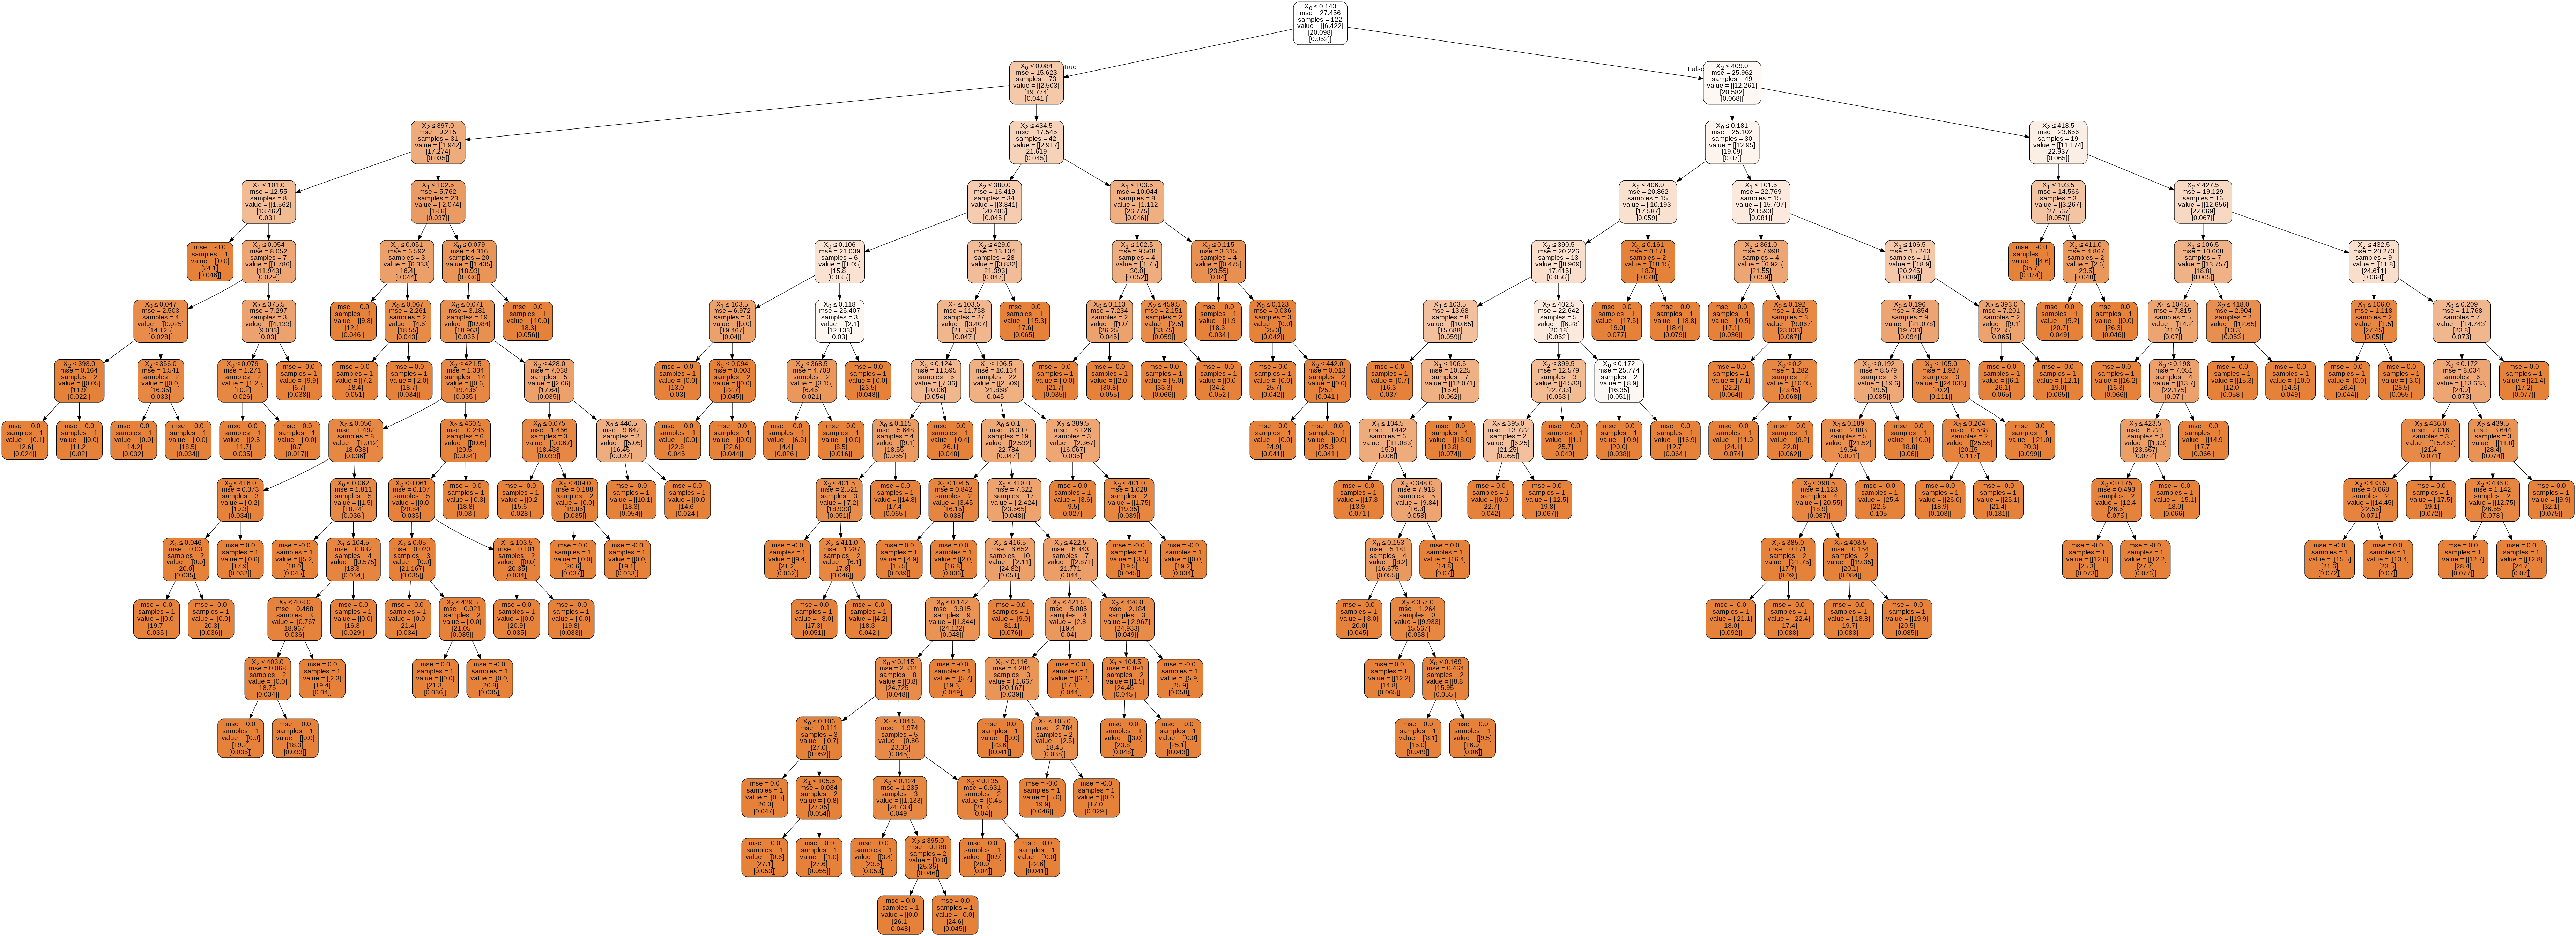

In [ ]:

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = None ,class_names=['EE','EC','costoPonderado'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('datos.png')
Image(graph.create_png())

In [ ]:
#Optimizando 
# Create Decision Tree classifer object
clf = DecisionTreeRegressor(max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))


Mean Absolute Error: 2.7208896831176186
Mean Squared Error: 18.934333564105007
Root Mean Squared Error: 4.35135996719474


In [ ]:
clf.score(X_test, Y_test)

0.29285424650269576

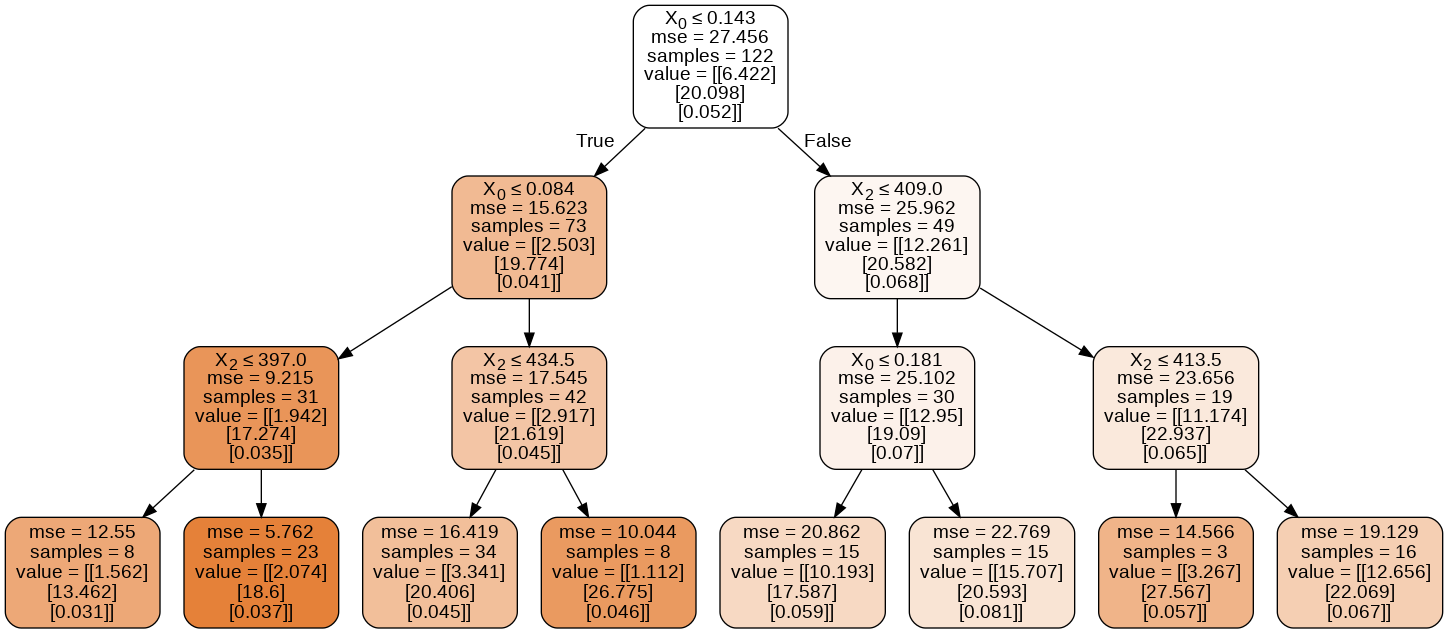

In [ ]:
#feature_names = ['Calidad','Dureza','Tasa_Prod']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = None ,class_names=['EE','EC','costoPonderado'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('datos2.png')
Image(graph.create_png())

In [ ]:
print(mclf.get_params())

{'estimator__ccp_alpha': 0.0, 'estimator__criterion': 'mse', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': None, 'estimator__splitter': 'best', 'estimator': DecisionTreeRegressor(), 'n_jobs': None}


In [ ]:
from sklearn.model_selection import GridSearchCV
#Defining hyperparameters
#boostrap: Method of selecting samples for training each tree
# max_depth: Maximum number of levels in tree
# max_features: Number of features to consider at every split
# n_estimators: Number of trees 

param_grid = { 'max_depth': [1,2,3], 'max_features': [1, 2, 3],'min_samples_split':[2, 3 ,4, 5, 6, 7], 'min_samples_leaf': [2, 3 ,4, 5, 6, 7] }

In [ ]:
g_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
 cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [ ]:
import time
start_time = time.time()
g_search.fit(X_train, Y_train);
print(g_search.best_score_)
print(g_search.best_params_)
print("Execution time: " + str((time.time() - start_time)) + ' ms')

0.2004668079386902
{'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 7, 'min_samples_split': 6}
Execution time: 1.7232670783996582 ms


In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# Create Decision Tree classifer object
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

clf = DecisionTreeRegressor()
mclf = MultiOutputRegressor(clf)
clf.set_params(max_depth = 2, min_samples_leaf = 3, min_samples_split = 7)
mclf.fit(X_train, Y_train)
clf.fit(X_train, Y_train)
#Predict the response for test dataset
y_pred = mclf.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 2.888058998318194
Mean Squared Error: 20.61899073422654
Root Mean Squared Error: 4.540813884561504


# **XGBoost**

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train = pd.DataFrame(X_train)
Y_train = pd.DataFrame(Y_train)
X_test = pd.DataFrame(X_test)
xg = xgb.XGBRegressor()
mxg = MultiOutputRegressor(xg)
mxg.fit(X_train, Y_train)
y_pred = mxg.predict(X_test)

[17:19:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 2.920816997883931
Mean Squared Error: 22.88587018875721
Root Mean Squared Error: 4.783917870193552


In [ ]:
mxg.score(X_test, Y_test)

0.18501613868526487

In [ ]:
print(mxg.get_params())

{'estimator__base_score': 0.5, 'estimator__booster': 'gbtree', 'estimator__colsample_bylevel': 1, 'estimator__colsample_bynode': 1, 'estimator__colsample_bytree': 1, 'estimator__gamma': 0, 'estimator__importance_type': 'gain', 'estimator__learning_rate': 0.1, 'estimator__max_delta_step': 0, 'estimator__max_depth': 3, 'estimator__min_child_weight': 1, 'estimator__missing': None, 'estimator__n_estimators': 100, 'estimator__n_jobs': 1, 'estimator__nthread': None, 'estimator__objective': 'reg:linear', 'estimator__random_state': 0, 'estimator__reg_alpha': 0, 'estimator__reg_lambda': 1, 'estimator__scale_pos_weight': 1, 'estimator__seed': None, 'estimator__silent': None, 'estimator__subsample': 1, 'estimator__verbosity': 1, 'estimator': XGBRegressor(), 'n_jobs': None}


In [ ]:
from sklearn.model_selection import GridSearchCV
#Defining hyperparameters
#boostrap: Method of selecting samples for training each tree
# max_depth: Maximum number of levels in tree
# max_features: Number of features to consider at every split
# n_estimators: Number of trees 

param_grid = {'estimator__base_score': [1,2,3], 'estimator__booster': ['gbtree'], 'estimator__colsample_bylevel': [1]}
# =  {'min_child_weight': [1,2 ,3],'booster':[1,2,3], 'gamma':[0,1,2,3]}

In [ ]:
g_search = GridSearchCV(estimator = mxg, param_grid = param_grid, 
 cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [ ]:
#Y_test

In [ ]:
#X_train

In [ ]:
#y_pred

In [ ]:
import time
start_time = time.time()
g_search.fit(X_train, Y_train)
print(g_search.best_score_)
print(g_search.best_params_)
print("Execution time: " + str((time.time() - start_time)) + ' ms')

[17:19:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +
/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +
/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +
/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extr

[17:19:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +
/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +
/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +
/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extr

[17:19:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +
/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train = pd.DataFrame(X_train)
Y_train = pd.DataFrame(Y_train)
X_test = pd.DataFrame(X_test)
xg = xgb.XGBRegressor()
mxg = MultiOutputRegressor(xg)
mxg.set_params(estimator__base_score = 3,estimator__booster = 'gbtree',estimator__colsample_bylevel = 1)
mxg.fit(X_train, Y_train)
y_pred = mxg.predict(X_test)

[17:19:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 2.866560698286932
Mean Squared Error: 22.24814720103167
Root Mean Squared Error: 4.716794165641709


In [ ]:
'''xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        estimator__base_score: 3,
        estimator__booster: 'gbtree', 
        estimator__colsample_bylevel: 1)

%time xgb_model.fit(X_train, Y_train, early_stopping_rounds=5, eval_set=[(X_val, Y_val)], verbose=False)

Y_pred_xgb = xgb_model.predict(X_val)

mae_xgb = mean_absolute_error(Y_val, Y_pred_xgb)

print("MAE: ", mae_xgb)'''

'xgb_model = XGBRegressor(\n        objective = \'reg:squarederror\',\n        estimator__base_score: 3,\n        estimator__booster: \'gbtree\', \n        estimator__colsample_bylevel: 1)\n\n%time xgb_model.fit(X_train, Y_train, early_stopping_rounds=5, eval_set=[(X_val, Y_val)], verbose=False)\n\nY_pred_xgb = xgb_model.predict(X_val)\n\nmae_xgb = mean_absolute_error(Y_val, Y_pred_xgb)\n\nprint("MAE: ", mae_xgb)'

In [ ]:
def prediccionFinal():

  dureza_ = float(input("Dureza: "))
  tasa_prod_ = float(input("Tasa de Producción: "))
  calidad_ = float(input("Calidad :"))
  #x_train = np.array([dureza_, tasa_prod_, calidad_])
  x_train = pd.DataFrame(np.array([[dureza_, tasa_prod_, calidad_]]))
  prediccion_final = mclf.predict(x_train)

  energia_ec = prediccion_final[(0,0)]
  energia_ee = prediccion_final[(0,1)]
  costo_ponderado = prediccion_final[(0,2)]
  
  print('---------')
  print('Energía calórica: ', energia_ec)
  print('Energía eléctrica: ', energia_ee)
  print('Costo Ponderado: ', costo_ponderado)


# Energía Calórica, Energía Eléctrica, Costo Ponderado

In [ ]:
prediccionFinal()

Dureza: 98
Tasa de Producción: 330
Calidad :0.10
---------
Energía calórica:  19.099999999999998
Energía eléctrica:  19.296153846153846
Costo Ponderado:  0.07380842988621712


**TABLA DE COMPARACIONES**

In [ ]:
from tabulate import tabulate
table = [["SVM Score","-0.4357610390318198", "SVM MAE", "3.413689", "SVM MSE", "32.225362", "SVM RSME", "5.676738"], ["DECISION TREE Score", "0.29285424650269576", "Decision Tree MAE", "2.88","Decision Tree MSE", "20.61", "Decision Tree RMSE", "4.54" ], ["XGBoost Score", "0.18501613868526487", "XGBoost MAE", "2.866560 ", "XGBoost MSE", "22.248147 ", "XGBoost RMSE", "4.716794"]]
print(tabulate(table))

-------------------  ---------  -----------------  -------  -----------------  -------  ------------------  -------
SVM Score            -0.435761  SVM MAE            3.41369  SVM MSE            32.2254  SVM RSME            5.67674
DECISION TREE Score   0.292854  Decision Tree MAE  2.88     Decision Tree MSE  20.61    Decision Tree RMSE  4.54
XGBoost Score         0.185016  XGBoost MAE        2.86656  XGBoost MSE        22.2481  XGBoost RMSE        4.71679
-------------------  ---------  -----------------  -------  -----------------  -------  ------------------  -------
